# Flood Prediction using Machine Learning Model

- This Machine Learning Model uses 3 Machine Learning Algorithms namely KNN Classification, Logistic Regression[LR], Support Vector[SVM] to get the best possible model to predict the floods using Kerala Rainfall Data.

- This project introduces the most promising prediction methods for both long-term and short-term floods and uses algorithms like K Nearest Neighbors (KNN), Standard Vector Machine (SVM), Logistic Regression (LR). This work can be used as a guideline for hydrologists as well as climate scientists in choosing the proper ML method according to the prediction task.


## FLOOD SITUATION IN KERALA 

The state of Kerala does not experience floods as worse as the Indo-Gangetic Plains do but it is becoming more prone to flooding by the year. While Kerala floods largely occur as a result of incessant heavy rainfall, other factors that contribute to Kerala floods include mismanagement of water resources and forests. Human interventions including reclamation of wetlands and water bodies, construction and expansion of roadways, establishment of more and more settlements, deforestation, etc. have increased over the last few years in Kerala. It is estimated that 26% of the total geographical area of Kerala is prone to floods.


## MEASUREMENT OF PRECIPITATION

- Non-recording Gauges
- Recording Gauges
- Radar Measurement of Rainfall
- Observations by Satellite

## Estimation of  missing data

- Sometimes a station has a break in record due to absence of an observer or failure of the instrument. It is then necessary to estimate that missing data.
- Arithmetic Mean Method 

        If the normal precipitation at each of these selected stations is within 10% of that for the station  with missing data, then a simple arithmetical mean of the precipitation of those stations will give the value of the missing station.

        Px =(P1 + P2 + P3 + ................ + Pm )/m
        
- Normal Ratio Method

        If normal precipitation at any of these selected stations is above 10% of that for station with missing data then,

        Px /Nx = 1/m*(P1/N1 + P2/N2 + ........ + Pm/Nm)
        
        Where, 
        P1 = Precipitation of 1st station
        N1 = Normal precipitation of the 1st station
        m  = No. of additional station chosen
        Px = Precipitation (missing data)
        Nx = Normal precipitation of the station at which data is missing


## Data Inconsistency
- Data inconsistency can be solved by Double Mass Curve

![Image](double-mass-curve.jpg)



## Technologies used 
**The entire analysis and Machine Learning model building is done using Python Programming Language in Jupyter Notebook IDE.**
 
**Library of Python used are**  :
- Pandas ( for data representation )
- Numpy ( for numerical computation )
- Matplotlib ( for data visualization )
- Scikit Learn ( for model training and testing )
- Seaborn ( for data visualization )


## Data Insights

- The dataset has in total 118 data points from year 1901 to 2018, which contain rainfall data of 12 months and annual rainfall together. Apart from this it also contains the past flood records.

### Importing Required Libraries.

In [3]:
pip install seaborn --quiet

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\HIMANGSHUB\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt
data = pd.read_csv('kerala.csv')
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUALRAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [5]:
data.tail()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUALRAINFALL,FLOODS
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO
117,KERALA,2018,29.1,52.1,48.6,116.4,183.8,625.4,1048.5,1398.9,423.6,356.1,125.4,65.1,4473.0,YES


# Check for missing values

- cheaking if any colomns is left empty or not.
- Data has no null or NaN value

In [6]:
data.isnull().sum()

SUBDIVISION       0
YEAR              0
JAN               0
FEB               0
MAR               0
APR               0
MAY               0
JUN               0
JUL               0
AUG               0
SEP               0
OCT               0
NOV               0
DEC               0
ANNUALRAINFALL    0
FLOODS            0
dtype: int64

# DATASET CHECKOUT 

In [7]:
print(data.shape)

(118, 16)


In [8]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUALRAINFALL
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,1959.500000,12.218644,15.633898,36.670339,110.330508,228.644915,651.617797,698.220339,430.369492,246.207627,293.207627,162.311017,40.009322,2925.405085
std,34.207699,15.473766,16.406290,30.063862,44.633452,147.548778,186.181363,228.988966,181.980463,121.901131,93.705253,83.200485,36.676330,452.169407
min,1901.000000,0.000000,0.000000,0.100000,13.100000,53.400000,196.800000,167.500000,178.600000,41.300000,68.500000,31.500000,0.100000,2068.800000
25%,1930.250000,2.175000,4.700000,18.100000,74.350000,125.050000,535.550000,533.200000,316.725000,155.425000,222.125000,93.025000,10.350000,2613.525000
50%,1959.500000,5.800000,8.350000,28.400000,110.400000,184.600000,625.600000,691.650000,386.250000,223.550000,284.300000,152.450000,31.100000,2934.300000
75%,1988.750000,18.175000,21.400000,49.825000,136.450000,264.875000,786.975000,832.425000,500.100000,334.500000,355.150000,218.325000,54.025000,3170.400000
max,2018.000000,83.500000,79.000000,217.200000,238.000000,738.800000,1098.200000,1526.500000,1398.900000,526.700000,567.900000,365.600000,202.300000,4473.000000


In [9]:
data.info

<bound method DataFrame.info of     SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL     AUG  \
0        KERALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0   357.5   
1        KERALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0   315.8   
2        KERALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5   420.2   
3        KERALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5   351.8   
4        KERALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5   293.6   
..          ...   ...   ...   ...   ...    ...    ...     ...     ...     ...   
113      KERALA  2014   4.6  10.3  17.9   95.7  251.0   454.4   677.8   733.9   
114      KERALA  2015   3.1   5.8  50.1  214.1  201.8   563.6   406.0   252.2   
115      KERALA  2016   2.4   3.8  35.9  143.0  186.4   522.2   412.3   325.5   
116     KERALA   2017   1.9   6.8   8.9   43.6  173.5   498.5   319.6   531.8   
117      KERALA  2018  29.1  52.1  48.6  116.4  183.8   625.4  1048.5  1398.9

<AxesSubplot:>

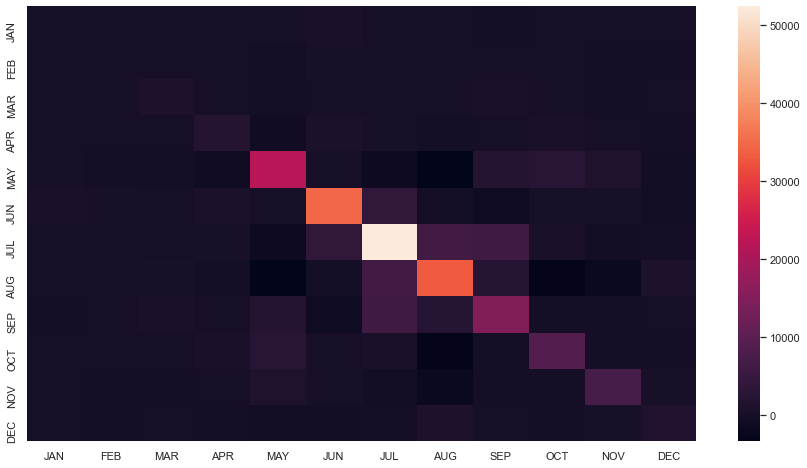

In [108]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(data.iloc[:,2:14].cov())


<AxesSubplot:>

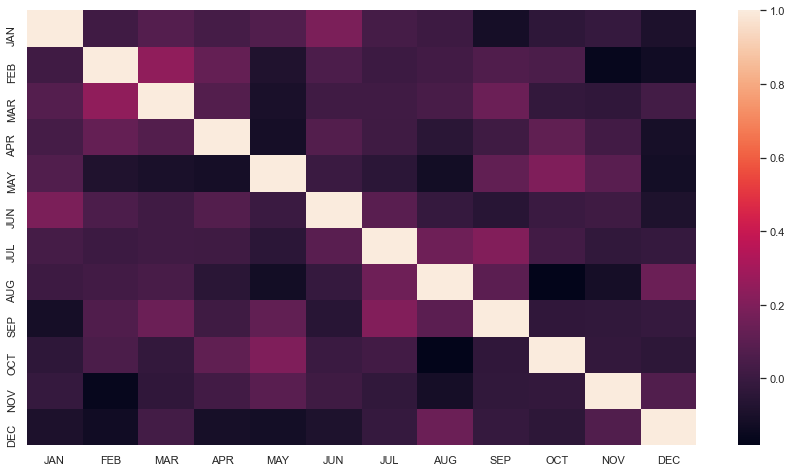

In [107]:
plt.figure(figsize=(15,8))
sns.heatmap(data.iloc[:,2:14].corr())


## Replacing the flood results of yes/no by 1/0

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
type(data.FLOODS)
data['FLOODS'] = le.fit_transform(data.FLOODS)
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUALRAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


In [13]:
data.iloc[0][2:14].sum() 

3248.6000000000004

# Data for fitting the models

In [14]:
data_inputs=data.iloc[:,2:14].values
print(data_inputs)


[[ 28.7  44.7  51.6 ... 266.9 350.8  48.4]
 [  6.7   2.6  57.3 ... 358.4 158.3 121.5]
 [  3.2  18.6   3.1 ... 354.1 157.   59. ]
 ...
 [  2.4   3.8  35.9 ... 225.9 125.4  23.6]
 [  1.9   6.8   8.9 ... 192.4  92.5  38.1]
 [ 29.1  52.1  48.6 ... 356.1 125.4  65.1]]


In [15]:
data_outputs=data.iloc[:,-1].values
print(data_outputs)


[1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0
 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1
 0 1 1 0 0 0 1]


## Number of time flood occur from 1901 to 2018

- 60 times flood occurs

In [16]:
data['FLOODS'].value_counts()

1    60
0    58
Name: FLOODS, dtype: int64

# DATA VISUALISATION

In [17]:
copy_df_data = data.copy()

In [18]:
copy_df_data.columns[2:14]

Index(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT',
       'NOV', 'DEC'],
      dtype='object')

In [19]:
sns.set(style='whitegrid', color_codes=True)

# RAINFALL DATA REPRESENTATION 

- A moving average is a statistic that captures the average change in a data series over time.
- A moving average plot is made which smoothes out the fluctuations in time series and helps in determining the trend of rainfall.

In [20]:
copy_df_data = data.copy()

In [21]:
copy_df_data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUALRAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


### MOVING AVERAGE OF RAINFALL DATA

The rolling average or moving average is the simple mean of the last ‘n’ values. It can help us in finding trends that would be otherwise hard to detect. Also, they can be used to determine long-term trends. You can simply calculate the rolling average by summing up the previous ‘n’ values and dividing them by ‘n’ itself. But for this, the first (n-1) values of the rolling average would be Nan.

In [22]:
copy_df_data["MOVING_AVG"] = data.ANNUALRAINFALL.rolling(5).mean()

In [23]:
copy_df_data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUALRAINFALL,FLOODS,MOVING_AVG
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1,NaN
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1,NaN
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1,NaN
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1,NaN
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0,3143.54


In [24]:
MOVING_AVG_10 =  data.ANNUALRAINFALL.rolling(10).mean()
MOVING_AVG_5 = data.ANNUALRAINFALL.rolling(5).mean()
data.insert(loc=15,column="moving_avg_10",value=MOVING_AVG_10)
data.insert(loc=15,column="moving_avg_5",value=MOVING_AVG_5)
# data.drop('MOVING_AVG_5',axis=1, inplace=True)

In [25]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUALRAINFALL,moving_avg_5,moving_avg_10,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,NaN,NaN,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,NaN,NaN,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,NaN,NaN,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,NaN,NaN,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,3143.54,NaN,0


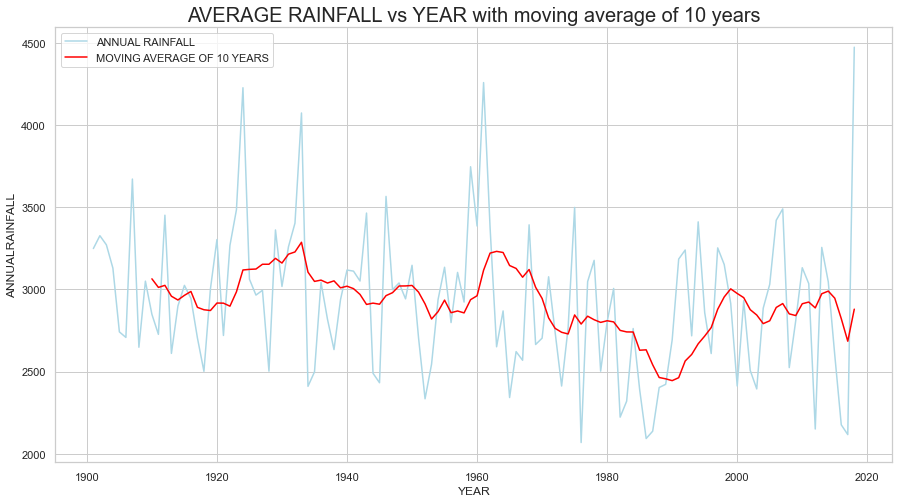

In [26]:
plt.figure(figsize=(15,8))
plt.title("AVERAGE RAINFALL vs YEAR with moving average of 10 years",fontsize="20")
annual = sns.lineplot(x=data["YEAR"] , y=data["ANNUALRAINFALL"],label="ANNUAL RAINFALL" ,color="lightblue")
annual = sns.lineplot(x=data["YEAR"] , y=data["moving_avg_10"], label="MOVING AVERAGE OF 10 YEARS" , color="red")

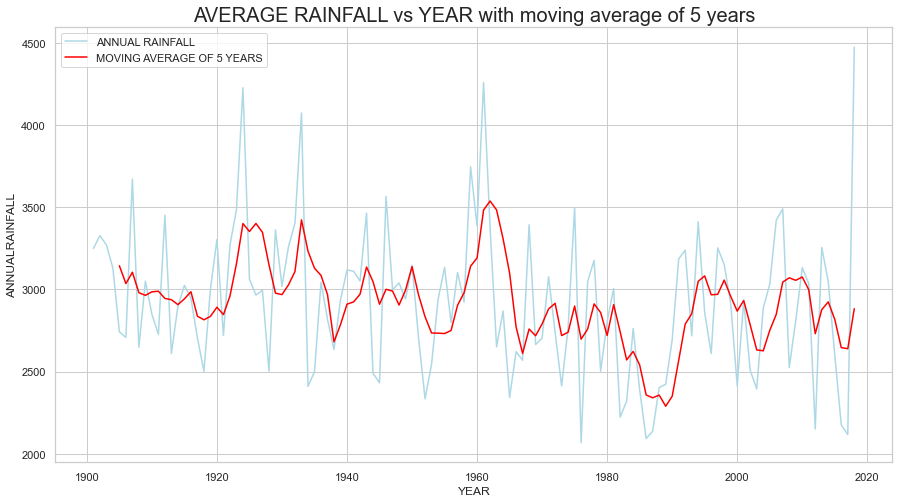

In [27]:
plt.figure(figsize=(15,8))
plt.title("AVERAGE RAINFALL vs YEAR with moving average of 5 years",fontsize="20")
annual = sns.lineplot(x=data["YEAR"] , y=data["ANNUALRAINFALL"],label="ANNUAL RAINFALL" ,color="lightblue")
annual = sns.lineplot(x=data["YEAR"] , y=data["moving_avg_5"], label="MOVING AVERAGE OF 5 YEARS" , color="red")

For the short term rainfall trend we have taken a 5 years interval for better visualization. From the curve it shows a downward trend, which signifies precipitation is decreasing with time.Recent year data shows an increasing trend of rainfall, so there is possibility of increase in rainfall in the next 5 to 10 years.

For a long term rainfall determination trend 10 years of moving average is taken. In the upcoming 10-20 year there is a possibility of an increase in precipitation in Kerala. 

## RAINFALL vs MONTH every year line graphs

- The rainfall is high in the period between June to Sept. The peak value of rainfall is in this period only.

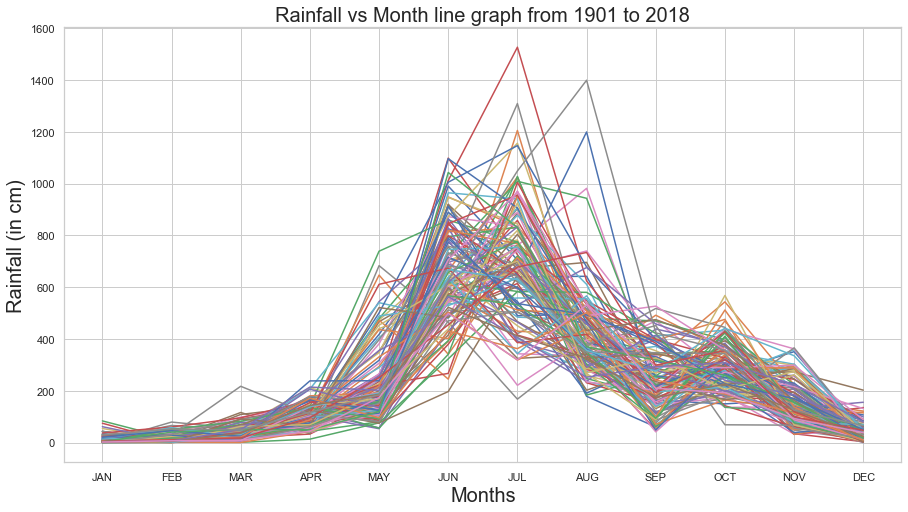

In [28]:
plt.figure(figsize=(15,8))
plt.xlabel("Months",fontsize="20")
plt.ylabel("Rainfall (in cm)",fontsize="20")
plt.title("Rainfall vs Month line graph from 1901 to 2018" ,fontsize="20")
for i in range(118):
    plt.plot( copy_df_data.columns[2:14] ,copy_df_data.iloc[i].values[2:14] )

## Histogram of rainfall for Jun-sept

- The rainfall data of June, July, Aug and Sept seems to have more weightage in predicting the flood occurrence. 
- Every year in the month of June, rainfall of  500-600 cm is more frequent. Similarly in July it's 600-700 cm, in Aug it is in the range of 300-400 cm and in the month of September it is about 200 cm.

<AxesSubplot:xlabel='SEP', ylabel='Count'>

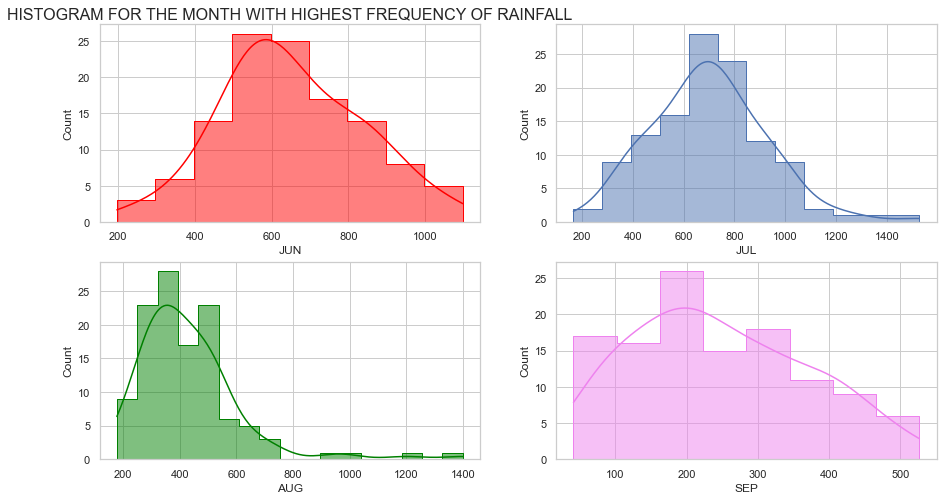

In [29]:
figure, axes = plt.subplots(2, 2, sharex=False, figsize=(15, 8))
sns.histplot(data=data[['JUN']],x="JUN",ax=axes[0,0],kde=True,element="step",color="red").set_title("HISTOGRAM FOR THE MONTH WITH HIGHEST FREQUENCY OF RAINFALL",fontsize="16")
sns.histplot(data=data[['JUL']],  x="JUL" ,ax=axes[0,1] ,kde=True,element="step")
sns.histplot(data=data[['AUG']],  x="AUG" , ax=axes[1,0],kde=True,element="step",color="green")
sns.histplot(data=data[['SEP']], x="SEP", ax=axes[1,1],kde=True,element="step",color="violet")

## Annual Rainfall vs Year plots

<AxesSubplot:title={'center':'ANNUAL RAINFALL vs YEAR'}, xlabel='YEAR', ylabel='ANNUALRAINFALL'>

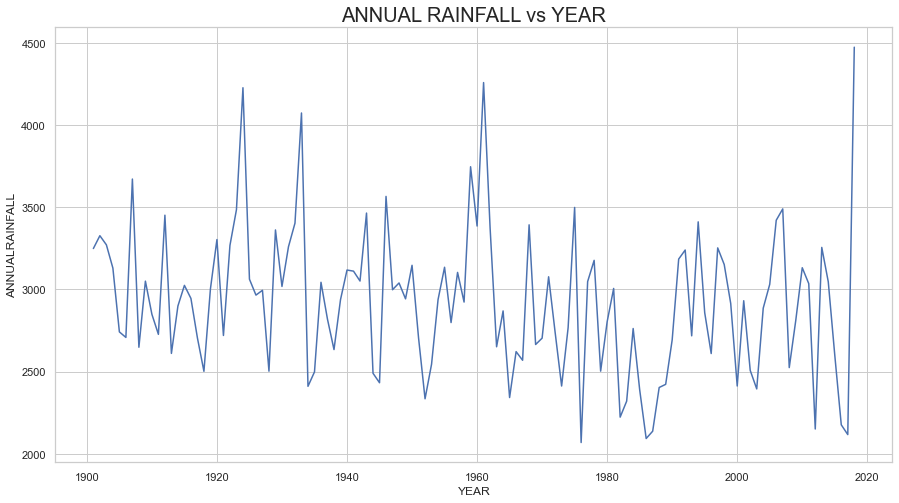

In [30]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
plt.title("ANNUAL RAINFALL vs YEAR",fontsize="20")
sns.lineplot(data=data , x="YEAR" , y="ANNUALRAINFALL", palette="viridis_r" )


## Flood records and Annual rainfall relation

<AxesSubplot:title={'center':'Time series graph with flood records'}, xlabel='YEAR', ylabel='ANNUALRAINFALL'>

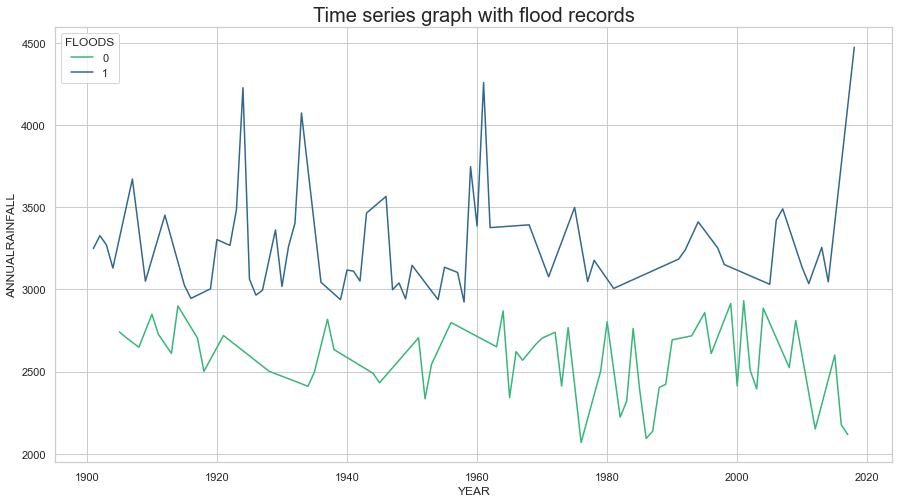

In [31]:
plt.figure(figsize=(15,8))
plt.title("Time series graph with flood records",fontsize="20")
sns.lineplot(data=data , x="YEAR" , y="ANNUALRAINFALL" , hue="FLOODS", palette="viridis_r" )

The ‘0’ represents the non-occurrence of flood and ‘1’ represents the occurrence of floods. From the plot it can be considered that annual rainfall of 3000 cm is a pivot value for predicting flood. Most of the floods that occur have annual rainfall above 3000 cm and below that it shows a safe zone. The below graph shows a scatter plot of the annual rainfall data which will help in classifying the floods.

<AxesSubplot:title={'center':'Annual rainfall vs Year with flood records'}, xlabel='YEAR', ylabel='ANNUALRAINFALL'>

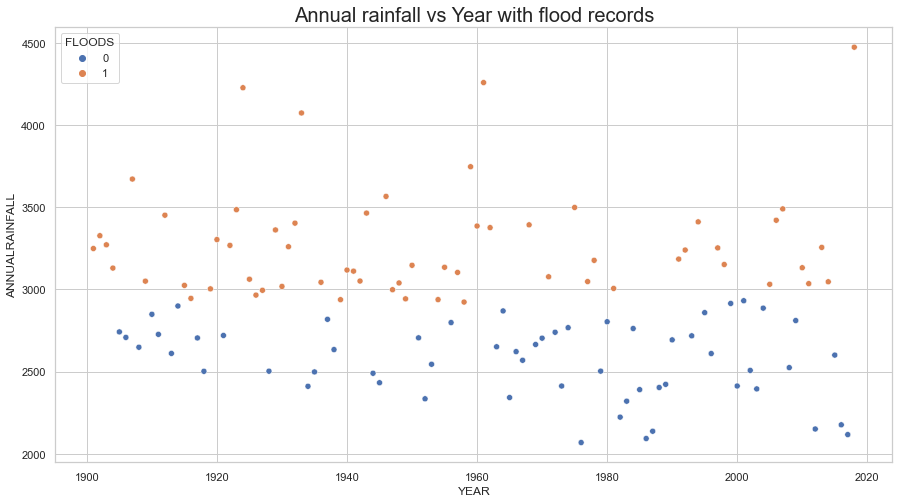

In [32]:
plt.figure(figsize=(15,8))
plt.title("Annual rainfall vs Year with flood records",fontsize="20")
sns.scatterplot(data=data, x="YEAR", y='ANNUALRAINFALL' , hue="FLOODS")

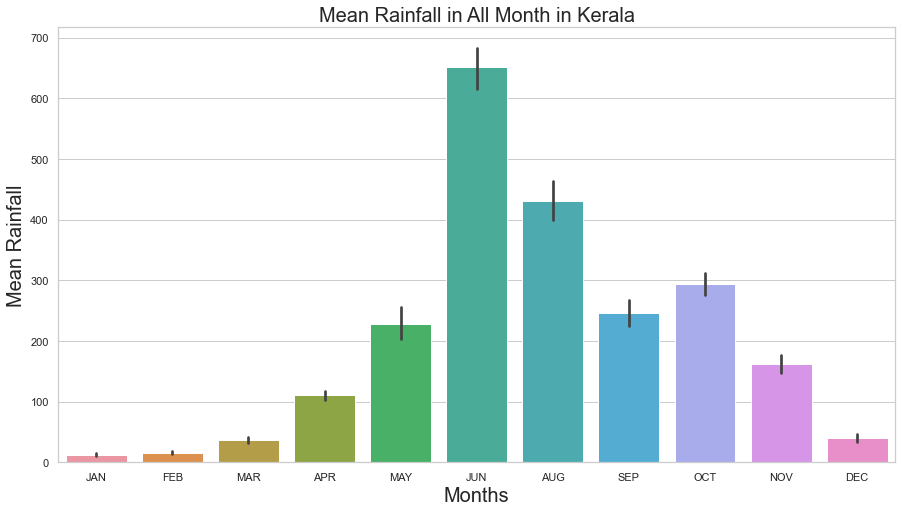

In [33]:
plt.figure(figsize=(15,8))
plt.title("Mean Rainfall in All Month in Kerala",fontsize="20")
plt.ylabel("Mean Rainfall",fontsize="20")
plt.xlabel("Months",fontsize="20")
ax = sns.barplot(data = data[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN', 'AUG', 'SEP', 'OCT','NOV','DEC']])
# for i in ax.containers:
#     ax.bar_label(i,)

# USE OF MACHINE LEARNING MODELS

# Using sklearn to develop the ML Model

In [34]:
pip install sklearn --quiet

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\HIMANGSHUB\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


## dividing the dataset into training and testing dataset. 

In [35]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data_inputs,data_outputs,test_size=0.3,random_state=0)
x_train[:3]

array([[ 18.8,   4.8,  55.7, 170.8, 101.4, 770.9, 760.4, 981.5, 225. ,
        309.7, 219.1,  52.8],
       [  1.2,  16. ,  25.7,  70.2, 381.2, 872. , 835.3, 358.8,  41.3,
        280.1, 192.5,  28.9],
       [  1.8,  23.8,  21.4, 111.6, 453.2, 607.3, 700.4, 266.3,  88. ,
        567.9,  68.1,   4.9]])

In [36]:
type(x_train)

numpy.ndarray

In [37]:
y_train

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0])

In [38]:
# type casting.
y_train=y_train.astype('int')
type(y_train)

numpy.ndarray

In [39]:
type(x_test)

numpy.ndarray

In [40]:
y_test=y_test.astype('int')
y_test

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0])

# KNN CLASSIFIER

In [41]:
clf=neighbors.KNeighborsClassifier(n_neighbors=5)
model_knn = clf.fit(x_train,y_train)

In [42]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("Predicted Values for the Floods:")
y_predict = model_knn.predict(x_test)
print("\nAccuracy Score:%f"%(accuracy_score(y_test,y_predict)*100))
print(confusion_matrix(y_test,y_predict))

Predicted Values for the Floods:

Accuracy Score:77.777778
[[16  5]
 [ 3 12]]


In [43]:
train_predict = model_knn.predict(x_train)
print("\nAccuracy Score:%f"%(accuracy_score(y_train,train_predict)*100))


Accuracy Score:91.463415


## FEATURE SCALING OF DATA (normalisation)

In [44]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
x_train_normal = minmax.fit_transform(x_train)
x_test_normal = minmax.transform(x_test)



## Standardization

In [45]:
from sklearn.preprocessing import StandardScaler
Sc = StandardScaler()
x_train_std= Sc.fit_transform(x_train)
x_test_std= Sc.transform(x_test)

## Choose n_neighbors

Text(0, 0.5, 'mean cross_val_score')

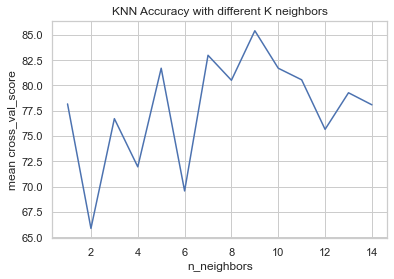

In [46]:
from sklearn.model_selection import cross_val_score,cross_val_predict
x_axis = []
y_axis = []
for i in range(1,15):
    clf = neighbors.KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(clf,x_train_normal,y_train ,cv=3).mean()
    x_axis.append(i)
    y_axis.append(score*100)
plt.plot(x_axis, y_axis)
plt.title("KNN Accuracy with different K neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("mean cross_val_score")

## KNN algorithm with scaled data

In [47]:
clf=neighbors.KNeighborsClassifier(n_neighbors=7)
model_knn_normal = clf.fit(x_train_normal,y_train)

Predicted Values for the Floods:

Accuracy Score:88.888889
Recall Score:93.333333
ROC score:89.523810


Text(0.5, 1.0, 'Confusion matrix')

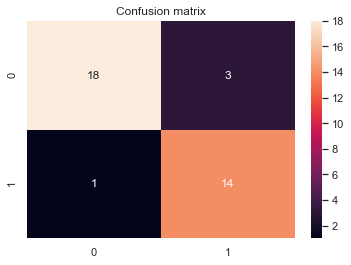

In [48]:
import seaborn as sns
print("Predicted Values for the Floods:")
y_predict_std = model_knn_normal.predict(x_test_normal)
print("\nAccuracy Score:%f"%(accuracy_score(y_test,y_predict_std)*100))
print("Recall Score:%f"%(recall_score(y_test,y_predict_std)*100))
print("ROC score:%f"%(roc_auc_score(y_test,y_predict_std)*100))
c_matrix = confusion_matrix(y_test,y_predict_std)
sns.heatmap(data=c_matrix,annot=True)
plt.title("Confusion matrix")

## Accuracy with K-folded cross validation

In [69]:
accuracy_score_val = cross_val_score(clf,x_train_normal,y_train,cv=5)
accuracy_score_val.mean()

0.7698529411764705

## Accuracy score for train data (for overfitting)

In [50]:
train_predict_std = model_knn_normal.predict(x_train_normal)
print("\nAccuracy Score:%f"%(accuracy_score(y_train,train_predict_std)*100))
print(confusion_matrix(y_train,train_predict_std))


Accuracy Score:86.585366
[[34  3]
 [ 8 37]]


In [51]:
copy_df_data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUALRAINFALL,FLOODS,MOVING_AVG
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1,NaN
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1,NaN
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1,NaN
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1,NaN
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0,3143.54


In [52]:
copy_df_data.iloc[0][2:14].values

array([28.7, 44.7, 51.6, 160.0, 174.7, 824.6, 743.0, 357.5, 197.7, 266.9,
       350.8, 48.4], dtype=object)

In [53]:
temp = minmax.transform([[28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4]])
other = minmax.transform([[0,0,0,0,0,0,0,0,0,0,0,0]])
neg = minmax.transform([[1.2,22.3, 9.4 , 105.9 , 263.3 , 850.2 , 520.5 , 293.6 , 217.2 , 383.5 , 74.4 , 0.2]])
test = minmax.transform([[6.7  , 2.6  , 57.3 ,  83.9 , 134.5 , 309.9 ,1205,   315.8 , 491.6 , 358.4, 158.3,  121.5]])
print(test)
print(temp)
print(model_knn_normal.predict(test))
print(model_knn_normal.predict(temp))
print(model_knn_normal.predict(neg))

[[0.08023952 0.03291139 0.26347305 0.31480658 0.11832507 0.07636278
  0.76342899 0.1659985  0.9276885  0.5804966  0.37952709 0.78120978]]
[[0.34371257 0.56582278 0.23721787 0.65317919 0.17697695 0.68103853
  0.42347314 0.21824104 0.32220849 0.39727673 0.95570189 0.31081081]]
[1]
[1]
[0]


# LOGISTIC REGRESSION

In [86]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_std,y_train)
lr_acc = cross_val_score(lr,x_train_std,y_train,cv=5,scoring='accuracy',n_jobs=1)
# lr_proba = cross_val_predict(lr,x_train_std,y_train,cv=3,method='predict_proba')
lr_acc

array([0.94117647, 0.82352941, 0.9375    , 1.        , 0.875     ])

### Accuracy for test data


Accuracy score:94.444444
recall score:100.000000
roc score:95.238095
[[19  2]
 [ 0 15]]


Text(0.5, 1.0, 'Confusion matrix')

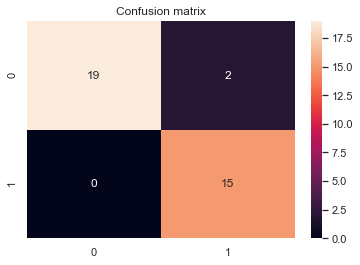

In [55]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
y_pred = lr.predict(x_test_std)
print("\nAccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))
sns.heatmap(data=confusion_matrix(y_test,y_pred),annot=True)
plt.title("Confusion matrix")

### Accuracy for train data


Accuracy Score:98.780488


Text(0.5, 1.0, 'Confusion matrix')

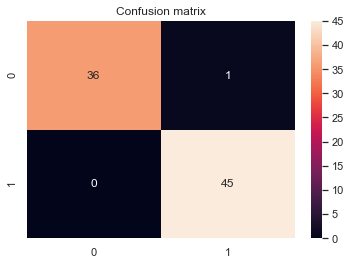

In [87]:
lr_train_predict2 = lr.predict(x_train_std)
print("\nAccuracy Score:%f"%(accuracy_score(y_train,lr_train_predict2)*100))
sns.heatmap(data=confusion_matrix(y_train,lr_train_predict2),annot=True)
plt.title("Confusion matrix")

### Support Vector Classification

In [90]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',probability=True)
svc_classifier=svc.fit(x_train_normal,y_train)
svc_acc=cross_val_score(svc_classifier,x_train_normal,y_train,cv=5,scoring="accuracy",n_jobs=-1)
# svc_proba=cross_val_predict(svc_classifier,x_train_normal,y_train,cv=3,method='predict_proba')
svc_acc

array([0.88235294, 0.76470588, 0.9375    , 0.875     , 0.8125    ])

In [58]:
y_pred=svc_classifier.predict(x_test_normal)
print("Actual Flood Values:    ",  y_test)
print("Predicted Flood Values: ",y_pred)

Actual Flood Values:     [0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0]
Predicted Flood Values:  [0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0]


### Accuracy of our model

In [59]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))
print(confusion_matrix(y_test,y_pred))


accuracy score:91.666667
recall score:100.000000
roc score:92.857143
[[18  3]
 [ 0 15]]


### Predict for Train data (check for overfitting/underfitting)

In [60]:
svm_train_predict2 = svc_classifier.predict(x_train_normal)
print("\nAccuracy Score:%f"%(accuracy_score(y_train,svm_train_predict2)*100))


Accuracy Score:98.780488


# Final Accuracy of our Models 

### Comparing all the prediction models

In [61]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('SVC', SVC()))

names = []
scores = []
for name, model in models:
    if name=='LR':
        model.fit(x_train_std, y_train)
        y_pred = model.predict(x_test_std)
    else :
        model.fit(x_train_normal, y_train)
        y_pred = model.predict(x_test_normal)
    scores.append(accuracy_score(y_test, y_pred)*100)
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name      Score
0  KNN  88.888889
1   LR  94.444444
2  SVC  91.666667


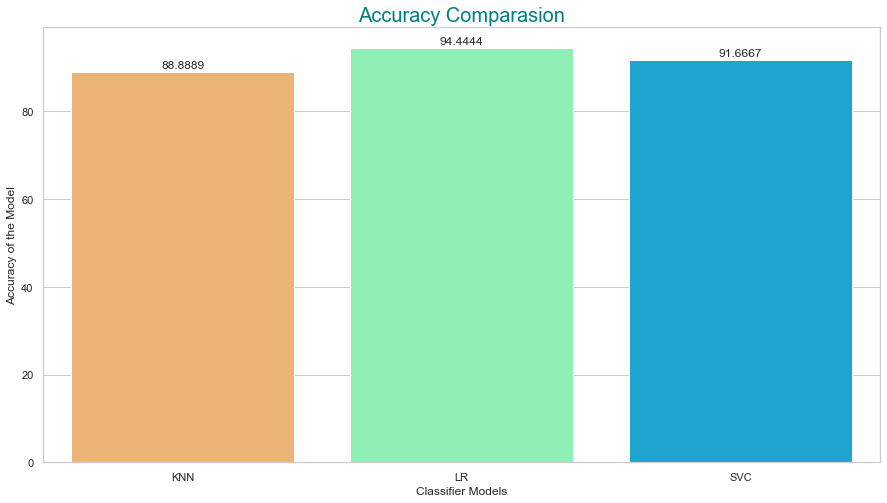

In [62]:
import seaborn as sns
plt.figure(figsize=(15,8))
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split ,palette="rainbow_r")
axis.set(xlabel='Classifier Models', ylabel='Accuracy of the Model')
plt.title("Accuracy Comparasion",fontsize="20",color="teal")
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 1, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [63]:
tr_split['Score'].max() 

94.44444444444444